In [2]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pytplot
from pytplot import get_data, store_data, tplot_rename, cdf_to_tplot
from matplotlib.cm import plasma
from pytplot import cdf_to_tplot  # Ensure cdf_to_tplot is imported

import data_management
from data_management import *
importlib.reload(data_management)

2025-04-27 00:03:06.800 - ⏱️ time management initialized
2025-04-27 00:03:06 - 📈 Data Management Initialized
2025-04-27 00:03:06 - 📈 Data Management Initialized


<module 'data_management' from '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__Magnetic_Hole_Investigation/data_management.py'>

In [8]:
#Original method from Jaye

#electron pads


spe_sf0_pad_cdf = 'MH_Investigation_Data/Downloaded_PSP_Data/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'
spe_sf0_pad_tplot = cdf_to_tplot(spe_sf0_pad_cdf, get_support_data=True)

for name in spe_sf0_pad_tplot:
    tplot_rename(name, 'psp_spe_' + name)

#Access electron strahl pitch-angle distribution (PAD)
epad_data=get_data('psp_spe_EFLUX_VS_PA_E')
epad_PA = get_data('psp_spe_PITCHANGLE')

print('epad_PA')
print(epad_PA)

epad_times=epad_data.times
epad_vals = epad_data.y
epad_PA_vals = epad_PA.y

#Note for E1-E9, electron strahl energy bin is 8, for E10 and above, it's 12
energy_index = 12
epad_strahl = epad_vals[:,:,energy_index]

datetime_spe = time_datetime(epad_times)
times_spe_repeat = np.repeat(np.expand_dims(datetime_spe,1),12,1)

epad_PA
variable(times=array([1.6958592e+09, 1.6958592e+09, 1.6958592e+09, ..., 1.6959456e+09,
       1.6959456e+09, 1.6959456e+09]), y=array([[  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       ...,
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5]], dtype=float32))


In [10]:
#SAFE Plotting

import importlib
import numpy as np
import matplotlib.pyplot as plt
import pytplot
from pytplot import get_data, store_data, tplot_rename, cdf_to_tplot
from matplotlib.cm import plasma

import data_management
from data_management import *
importlib.reload(data_management)

# Step 1: Download and load electron CDF File
cdf_file = 'MH_Investigation/Downloaded_PSP_Data/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'
cdf_to_tplot(cdf_file)

# Set the time range
# trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']
trange = ['2023-09-28/06:30:00.000', '2023-09-28/06:50:00.000']

# Rename the loaded tplot variables
# tplot_rename("EFLUX_VS_PA_E", "psp_spe_EFLUX_VS_PA_E")
# tplot_rename("QUALITY_FLAG", "psp_spe_QUALITY_FLAG")
# tplot_rename("EFLUX_VS_ENERGY", "psp_spe_EFLUX_VS_ENERGY")
# tplot_rename("MAGF_SC", "psp_spe_MAGF_SC")

epad_PA = get_data('psp_spe_PITCHANGLE')
print('epad_PA')
print(epad_PA)

# Check if PITCHANGLE exists and rename it if it does
if "PITCHANGLE" in pytplot.tplot_names():
    tplot_rename("PITCHANGLE", "psp_spe_PITCHANGLE")
    print("PITCHANGLE variable renamed to psp_spe_PITCHANGLE")
else:
    print("PITCHANGLE variable not found in loaded data")

print("Variables after renaming:")
print(pytplot.tplot_names())

# Get the data
epad_data = get_data('psp_spe_EFLUX_VS_PA_E')

# Check if PITCHANGLE exists in the loaded variables
if 'psp_spe_PITCHANGLE' in pytplot.tplot_names():
    epad_PA_data = get_data('psp_spe_PITCHANGLE')
    epad_PA = epad_PA_data.y
    print("Using loaded pitch angle data")
else:
    print("PITCHANGLE variable not found. Using default pitch angle values.")
    # Create a default pitch angle array if PITCHANGLE is not available
    epad_PA = np.linspace(0, 180, epad_data.y.shape[1])

times = epad_data.times
epad_vals = epad_data.y

# Determine the encounter number and set ebin
encounter_number = get_encounter_number(trange[0])
print(f"Encounter Number: {encounter_number}")
# ebin = 8 if encounter_number in ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'] else 12
ebin = 22
print(f"Using ebin: {ebin}")

# Process the data
epad_strahl = epad_vals[:, :, ebin]
store_data('E Strahl', data={'x': times, 'y': epad_strahl, 'v': epad_PA})
pytplot.options('E Strahl', 'Spec', 1)
pytplot.options('E Strahl', 'Zlog', 1)
pytplot.options('E Strahl', 'Colormap', plasma)

# Set plot options
pytplot.tplot_options('wsize', [1000, 800])
pytplot.tplot_options('axis_font_size', 10)
pytplot.tplot_options('yaxis_width', 2000)

# Plot the data
pytplot.xlim(trange[0], trange[1])
pytplot.tplot(['E Strahl'])

# Show the plot
plt.show()

2025-04-27 00:15:27 - 📈 Data Management Initialized


FileNotFoundError: /Users/robertalexander/Dropbox/__Collaborations/_NASA/__Magnetic_Hole_Investigation/MH_Investigation/Downloaded_PSP_Data/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf not found

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import plasma
import cdflib
from datetime import datetime
from matplotlib.dates import date2num, DateFormatter, AutoDateLocator
from matplotlib.colors import LogNorm

# Step 1: Read the electron CDF File
cdf_file = '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/Downloaded_PSP_Data/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'

cdf = cdflib.CDF(cdf_file)

# Get CDF info
cdf_info = cdf.cdf_info()

# List the variables in the CDF file
cdf_vars = cdf_info.rVariables + cdf_info.zVariables
print("CDF Variables:")
print(cdf_vars)

# Read the data
# Get EFLUX_VS_PA_E data
epad_vals = cdf.varget('EFLUX_VS_PA_E')
print("epad_vals shape:", epad_vals.shape)

# Get the time variable
# Get variable attributes to find out which variable is time
epad_var_atts = cdf.varattsget('EFLUX_VS_PA_E')
print("EFLUX_VS_PA_E variable attributes:")
print(epad_var_atts)

# Find the time variable from 'DEPEND_0' attribute
if 'DEPEND_0' in epad_var_atts:
    time_var_name = epad_var_atts['DEPEND_0']
    if isinstance(time_var_name, bytes):
        time_var_name = time_var_name.decode('utf-8')
    print(f"Time variable for EFLUX_VS_PA_E is {time_var_name}")
else:
    print("Time variable not found for EFLUX_VS_PA_E")
    # Try default time variable name
    time_var_name = 'Epoch_EFLUX_VS_PA_E'

# Get time data
epoch = cdf.varget(time_var_name)
print("Epoch data type:", type(epoch), "length:", len(epoch))

# Check the data type of 'Epoch' variable
epoch_var_info = cdf.varinq(time_var_name)
print("Epoch variable info:", epoch_var_info)

# Determine the epoch type and convert accordingly
epoch_type = epoch_var_info.Data_Type_Description
print("Epoch data type description:", epoch_type)

if 'CDF_TIME_TT2000' in epoch_type:
    times = cdflib.cdfepoch.tt2000_to_datetime(epoch)
elif 'CDF_EPOCH' in epoch_type:
    times = cdflib.cdfepoch.to_datetime(epoch)
elif 'CDF_EPOCH16' in epoch_type:
    times = cdflib.cdfepoch.to_datetime(epoch)
else:
    print("Unknown epoch type:", epoch_type)
    # Handle accordingly
    times = None

# Verify that times were converted
if times is None:
    raise ValueError("Unable to convert epoch times.")

print("First 5 times:", times[:5])
print("Type of times[0]:", type(times[0]))

# Convert times to numpy array
times = np.array(times)

# Ensure times are datetime.datetime objects
if not isinstance(times[0], datetime):
    # If times are strings, convert them to datetime.datetime objects
    times = np.array([datetime.fromisoformat(t) for t in times])

# Get pitch angle data
if 'PITCHANGLE' in cdf_vars:
    epad_PA = cdf.varget('PITCHANGLE')
    print("Using loaded pitch angle data")
    print("epad_PA shape:", epad_PA.shape)
else:
    print("PITCHANGLE variable not found. Using default pitch angle values.")
    # Create a default pitch angle array
    epad_PA = np.linspace(0, 180, epad_vals.shape[1])

# Determine the energy bin (ebin)
ebin = 22
print(f"Using ebin: {ebin}")

# Process the data
epad_strahl = epad_vals[:, :, ebin]
print("epad_strahl shape:", epad_strahl.shape)

# Set the time range
trange = ['2023-09-28/06:30:00.000', '2023-09-28/06:50:00.000']
t_start = datetime.strptime(trange[0], '%Y-%m-%d/%H:%M:%S.%f')
t_end = datetime.strptime(trange[1], '%Y-%m-%d/%H:%M:%S.%f')

# Create a mask for the time range
time_mask = (times >= t_start) & (times <= t_end)
times_selected = times[time_mask]
epad_strahl_selected = epad_strahl[time_mask, :]
epad_PA_selected = epad_PA[time_mask, :]  # Adjust if necessary

print("Times selected:", times_selected.shape)
print("epad_strahl_selected shape:", epad_strahl_selected.shape)

# If epad_PA is 2D, consider taking the mean across time or select appropriate indices
if epad_PA.ndim == 2:
    # Assuming pitch angles are constant across time
    epad_PA_mean = np.mean(epad_PA_selected, axis=0)
else:
    epad_PA_mean = epad_PA

# Plot the data
plt.figure(figsize=(10, 8))

# Convert times to matplotlib date numbers
times_num_selected = date2num(times_selected)

# Plot using imshow
extent = [times_num_selected[0], times_num_selected[-1], epad_PA_mean[0], epad_PA_mean[-1]]
plt.imshow(epad_strahl_selected.T, aspect='auto', origin='lower',
           extent=extent, cmap=plasma, norm=LogNorm())

plt.colorbar(label='E Strahl')
plt.xlabel('Time')
plt.ylabel('Pitch Angle (degrees)')
plt.title('E Strahl')

# Format x-axis dates
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax.xaxis.set_major_locator(AutoDateLocator())

plt.tight_layout()
plt.show()

CDF Variables:
['Epoch', 'TIME', 'MET', 'APID', 'SEQN', 'SEQN_DELTA', 'SEQN_GROUP', 'PKT_SIZE', 'SOURCE_APID', 'SOURCE_HASH', 'COMPR_RATIO', 'NDAT', 'DATASIZE', 'LTCSNNNN_BITS', 'ARCH_BITS', 'MODE2_ORI', 'MODE2', 'F0', 'STATUS_BITS', 'PEAK_BIN', 'PRODUCT_BITS', 'NUM_TOTAL', 'NUM_ACCUM', 'TIME_TOTAL', 'TIME_ACCUM', 'CNTS', 'GAP', 'QUALITY_FLAG', 'EFLUX_VS_PA_E', 'PITCHANGLE', 'ENERGY_VALS', 'EFLUX_VS_ENERGY', 'SPX_VS_PA_E', 'NSAMPLE_VS_PA_E', 'MAGF_SC']
epad_vals shape: (195357, 12, 32)
EFLUX_VS_PA_E variable attributes:
{'CATDESC': 'Differential Energy Flux vs Pitch-angle and Energy', 'FIELDNAM': 'Eflux vs Pitch-angle and Energy', 'LABLAXIS': 'Eflux vs PA-E', 'UNITS': 'eV/cm2-s-ster-eV', 'VAR_TYPE': 'data', 'DISPLAY_TYPE': 'spectrogram', 'DEPEND_0': 'Epoch', 'DEPEND_1': 'PITCHANGLE', 'FORMAT': 'E12.4', 'FILLVAL': nan, 'VALIDMIN': 0.001, 'VALIDMAX': 1e+16, 'SCALETYP': 'log', 'DEPEND_2': 'ENERGY_VALS'}
Time variable for EFLUX_VS_PA_E is Epoch
Epoch data type: <class 'numpy.ndarray'> leng

AttributeError: type object 'CDFepoch' has no attribute 'tt2000_to_datetime'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import plasma
import cdflib
from datetime import datetime
from matplotlib.dates import date2num, DateFormatter, AutoDateLocator
from matplotlib.colors import LogNorm

# Step 1: Read the electron CDF File
cdf_file = '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/Downloaded_PSP_Data/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'

cdf = cdflib.CDF(cdf_file)

# Get CDF info
cdf_info = cdf.cdf_info()

# List the variables in the CDF file
cdf_vars = cdf_info.rVariables + cdf_info.zVariables
print("CDF Variables:")
print(cdf_vars)

# Read the data
# Get EFLUX_VS_PA_E data
epad_vals = cdf.varget('EFLUX_VS_PA_E')
print("epad_vals shape:", epad_vals.shape)

# Get the time variable
# Get variable attributes to find out which variable is time
epad_var_atts = cdf.varattsget('EFLUX_VS_PA_E')
print("EFLUX_VS_PA_E variable attributes:")
print(epad_var_atts)

# Find the time variable from 'DEPEND_0' attribute
if 'DEPEND_0' in epad_var_atts:
    time_var_name = epad_var_atts['DEPEND_0']
    if isinstance(time_var_name, bytes):
        time_var_name = time_var_name.decode('utf-8')
    print(f"Time variable for EFLUX_VS_PA_E is {time_var_name}")
else:
    print("Time variable not found for EFLUX_VS_PA_E")
    # Try default time variable name
    time_var_name = 'Epoch_EFLUX_VS_PA_E'

# Get time data
epoch = cdf.varget(time_var_name)
print("Epoch data type:", type(epoch), "length:", len(epoch))

# Convert epoch to datetime
times = cdflib.cdfepoch.to_datetime(epoch)
print("First 5 times:", times[:5])

# Get pitch angle data
if 'PITCHANGLE' in cdf_vars:
    epad_PA = cdf.varget('PITCHANGLE')
    print("Using loaded pitch angle data")
    print("epad_PA shape:", epad_PA.shape)
else:
    print("PITCHANGLE variable not found. Using default pitch angle values.")
    # Create a default pitch angle array
    epad_PA = np.linspace(0, 180, epad_vals.shape[1])

# Determine the encounter number and set ebin
# For simplicity, we'll set ebin = 22 as in your code
ebin = 22
print(f"Using ebin: {ebin}")

# Process the data
epad_strahl = epad_vals[:, :, ebin]
print("epad_strahl shape:", epad_strahl.shape)

# Set the time range
trange = ['2023-09-28/06:30:00.000', '2023-09-28/06:50:00.000']
t_start = datetime.strptime(trange[0], '%Y-%m-%d/%H:%M:%S.%f')
t_end = datetime.strptime(trange[1], '%Y-%m-%d/%H:%M:%S.%f')
times = np.array(times)  # Convert to numpy array

# Create a mask for the time range
time_mask = (times >= t_start) & (times <= t_end)
times_selected = times[time_mask]
epad_strahl_selected = epad_strahl[time_mask, :]

print("Times selected:", times_selected.shape)
print("epad_strahl_selected shape:", epad_strahl_selected.shape)

# Plot the data
plt.figure(figsize=(10, 8))

# Convert times to matplotlib date numbers
times_num_selected = date2num(times_selected)

# Plot using imshow
extent = [times_num_selected[0], times_num_selected[-1], epad_PA[0], epad_PA[-1]]
plt.imshow(epad_strahl_selected.T, aspect='auto', origin='lower',
           extent=extent, cmap=plasma, norm=LogNorm())

plt.colorbar(label='E Strahl')
plt.xlabel('Time')
plt.ylabel('Pitch Angle (degrees)')
plt.title('E Strahl')

# Format x-axis dates
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax.xaxis.set_major_locator(AutoDateLocator())

plt.tight_layout()
plt.show()

CDF Variables:
['Epoch', 'TIME', 'MET', 'APID', 'SEQN', 'SEQN_DELTA', 'SEQN_GROUP', 'PKT_SIZE', 'SOURCE_APID', 'SOURCE_HASH', 'COMPR_RATIO', 'NDAT', 'DATASIZE', 'LTCSNNNN_BITS', 'ARCH_BITS', 'MODE2_ORI', 'MODE2', 'F0', 'STATUS_BITS', 'PEAK_BIN', 'PRODUCT_BITS', 'NUM_TOTAL', 'NUM_ACCUM', 'TIME_TOTAL', 'TIME_ACCUM', 'CNTS', 'GAP', 'QUALITY_FLAG', 'EFLUX_VS_PA_E', 'PITCHANGLE', 'ENERGY_VALS', 'EFLUX_VS_ENERGY', 'SPX_VS_PA_E', 'NSAMPLE_VS_PA_E', 'MAGF_SC']
epad_vals shape: (195357, 12, 32)
EFLUX_VS_PA_E variable attributes:
{'CATDESC': 'Differential Energy Flux vs Pitch-angle and Energy', 'FIELDNAM': 'Eflux vs Pitch-angle and Energy', 'LABLAXIS': 'Eflux vs PA-E', 'UNITS': 'eV/cm2-s-ster-eV', 'VAR_TYPE': 'data', 'DISPLAY_TYPE': 'spectrogram', 'DEPEND_0': 'Epoch', 'DEPEND_1': 'PITCHANGLE', 'FORMAT': 'E12.4', 'FILLVAL': nan, 'VALIDMIN': 0.001, 'VALIDMAX': 1e+16, 'SCALETYP': 'log', 'DEPEND_2': 'ENERGY_VALS'}
Time variable for EFLUX_VS_PA_E is Epoch
Epoch data type: <class 'numpy.ndarray'> leng

TypeError: '>=' not supported between instances of 'int' and 'datetime.datetime'

Variables in the CDF file:
Epoch
TIME
MET
APID
SEQN
SEQN_DELTA
SEQN_GROUP
PKT_SIZE
SOURCE_APID
SOURCE_HASH
COMPR_RATIO
NDAT
DATASIZE
LTCSNNNN_BITS
ARCH_BITS
MODE2_ORI
MODE2
F0
STATUS_BITS
PEAK_BIN
PRODUCT_BITS
NUM_TOTAL
NUM_ACCUM
TIME_TOTAL
TIME_ACCUM
CNTS
GAP
QUALITY_FLAG
EFLUX_VS_PA_E
PITCHANGLE
ENERGY_VALS
EFLUX_VS_ENERGY
SPX_VS_PA_E
NSAMPLE_VS_PA_E
MAGF_SC


TypeError: Incompatible X, Y inputs to pcolormesh; see help(pcolormesh)

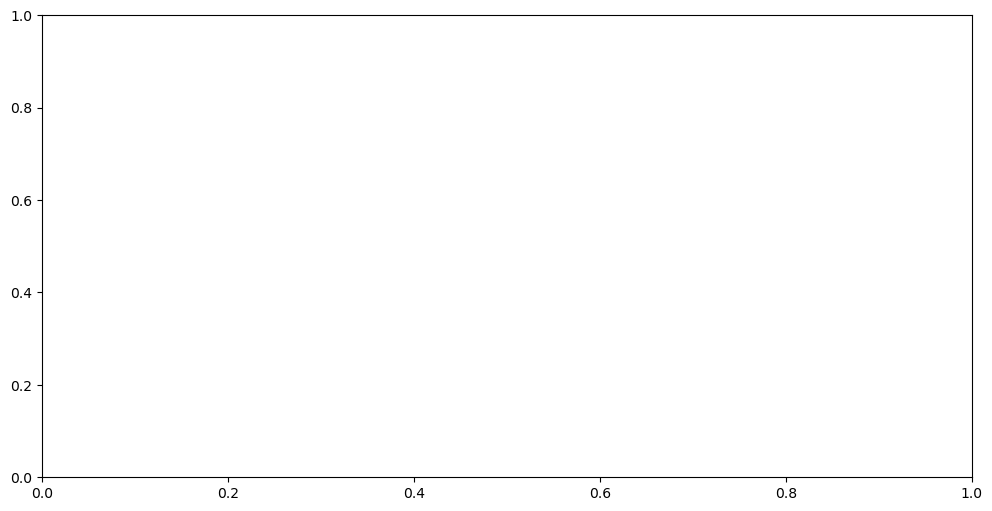

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cdflib
from datetime import datetime, timedelta

# Load CDF file
cdf_file = '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/Downloaded_PSP_Data/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'
cdf = cdflib.CDF(cdf_file)

# List all variables in the CDF file
print("Variables in the CDF file:")
for var in cdf.cdf_info().zVariables:
    print(var)

# Extract data
epoch_times = cdf.varget('Epoch')
eflux = cdf.varget('EFLUX_VS_PA_E')
pitch_angles = cdf.varget('PITCHANGLE')

# Convert epoch times to seconds since a reference date
reference_date = datetime(2000, 1, 1)
times_seconds = cdflib.epochs.CDFepoch.unixtime(epoch_times)
times = [reference_date + timedelta(seconds=t) for t in times_seconds]

# Set the time range
trange = [datetime(2023, 9, 28, 6, 30), datetime(2023, 9, 28, 6, 50)]
trange_seconds = [(t - reference_date).total_seconds() for t in trange]

# Find indices within the time range
time_mask = (times_seconds >= trange_seconds[0]) & (times_seconds <= trange_seconds[1])

# Filter data based on time range
times_filtered = np.array(times)[time_mask]
eflux_filtered = eflux[time_mask]

# Select energy bin (previously ebin)
energy_bin = 22
eflux_strahl = eflux_filtered[:, :, energy_bin]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
im = ax.pcolormesh(times_filtered, pitch_angles, eflux_strahl.T, 
                   norm=LogNorm(), cmap='plasma', shading='auto')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pitch Angle')
ax.set_title(f'Electron Flux vs Pitch Angle (Energy bin: {energy_bin})')

# Format x-axis
ax.xaxis_date()
fig.autofmt_xdate()

# Add colorbar
cbar = fig.colorbar(im)
cbar.set_label('Electron Flux')

# Show the plot
plt.tight_layout()
plt.show()

# Print some information about the data
print(f"Time range: {times_filtered[0]} to {times_filtered[-1]}")
print(f"Number of time points: {len(times_filtered)}")
print(f"Shape of eflux_strahl: {eflux_strahl.shape}")
print(f"Range of pitch angles: {pitch_angles[0]} to {pitch_angles[-1]}")

2024-10-03 18:56:59 - 📈 Data Management Initialized


03-Oct-24 18:57:00: /opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),

03-Oct-24 18:57:00: /opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)



epad_PA
variable(times=array([1.6958592e+09, 1.6958592e+09, 1.6958592e+09, ..., 1.6959456e+09,
       1.6959456e+09, 1.6959456e+09]), y=array([[  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       ...,
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5],
       [  7.5,  22.5,  37.5, ..., 142.5, 157.5, 172.5]], dtype=float32))
0 : psp_spe_Epoch
1 : psp_spe_TIME
2 : psp_spe_QUALITY_FLAG
3 : psp_spe_EFLUX_VS_PA_E
4 : psp_spe_PITCHANGLE
5 : psp_spe_ENERGY_VALS
6 : psp_spe_EFLUX_VS_ENERGY
7 : psp_spe_MAGF_SC
8 : QUALITY_FLAG
9 : EFLUX_VS_PA_E
10 : EFLUX_VS_ENERGY
11 : MAGF_SC
12 : E Strahl
PITCHANGLE variable not found in loaded data
Variables after renaming:
0 : psp_spe_Epoch
1 : psp_spe_TIME
2 : psp_spe_QUALITY_FLAG
3 : psp_spe_EFLUX_VS_PA_E
4 : psp_spe_PITCHANGLE
5 : psp_spe_ENERGY_VALS
6 : psp_spe_EFLUX_VS_ENERGY
7 :

AttributeError: module 'matplotlib.pyplot' has no attribute 'LogNorm'

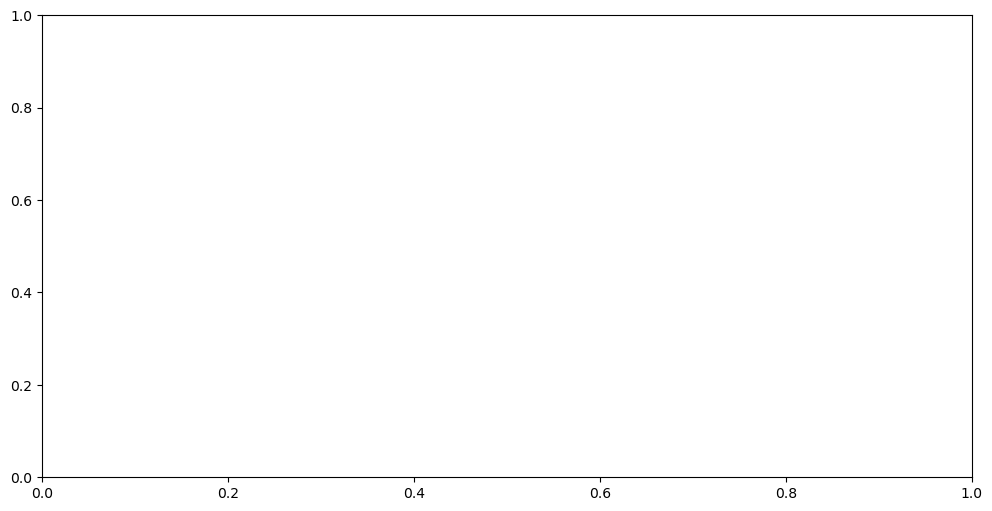

In [ ]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import plasma
from pytplot import get_data, store_data, tplot_rename, cdf_to_tplot

import data_management
from data_management import *
importlib.reload(data_management)

# Step 1: Download and load electron CDF File
cdf_file = '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/Downloaded_PSP_Data/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'
cdf_to_tplot(cdf_file)

# Set the time range
trange = ['2023-09-28/06:30:00.000', '2023-09-28/06:50:00.000']

epad_PA = get_data('psp_spe_PITCHANGLE')
print('epad_PA')
print(epad_PA)

# Check if PITCHANGLE exists and rename it if it does
if "PITCHANGLE" in pytplot.tplot_names():
    tplot_rename("PITCHANGLE", "psp_spe_PITCHANGLE")
    print("PITCHANGLE variable renamed to psp_spe_PITCHANGLE")
else:
    print("PITCHANGLE variable not found in loaded data")

print("Variables after renaming:")
print(pytplot.tplot_names())

# Get the data
epad_data = get_data('psp_spe_EFLUX_VS_PA_E')

# Check if PITCHANGLE exists in the loaded variables
if 'psp_spe_PITCHANGLE' in pytplot.tplot_names():
    epad_PA_data = get_data('psp_spe_PITCHANGLE')
    epad_PA = epad_PA_data.y
    print("Using loaded pitch angle data")
else:
    print("PITCHANGLE variable not found. Using default pitch angle values.")
    # Create a default pitch angle array if PITCHANGLE is not available
    epad_PA = np.linspace(0, 180, epad_data.y.shape[1])

times = epad_data.times
epad_vals = epad_data.y

# Determine the encounter number and set ebin
encounter_number = get_encounter_number(trange[0])
print(f"Encounter Number: {encounter_number}")
ebin = 22
print(f"Using ebin: {ebin}")

# Process the data
epad_strahl = epad_vals[:, :, ebin]

# Convert times to matplotlib dates
from matplotlib.dates import date2num
times_mpl = date2num(times)

# Create the plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
im = ax.pcolormesh(times_mpl, epad_PA, epad_strahl.T, 
                   norm=plt.LogNorm(), cmap=plasma, shading='auto')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Pitch Angle')
ax.set_title(f'Electron Flux vs Pitch Angle (Energy bin: {ebin})')

# Format x-axis
ax.xaxis_date()
fig.autofmt_xdate()

# Add colorbar
cbar = fig.colorbar(im)
cbar.set_label('Electron Flux')

# Set the time limits
from matplotlib.dates import datestr2num
ax.set_xlim(datestr2num(trange[0]), datestr2num(trange[1]))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
def get_high_res_strahl_data_from_cdf(cdf_file):
    import cdflib
    from cdflib.epochs import CDFepoch as cdfepoch
    import numpy as np
    
    # Open the CDF file
    cdf = cdflib.CDF(cdf_file)
    
    # Get the variable names
    cdf_info = cdf.cdf_info()
    variables = cdf_info['rVariables'] + cdf_info['zVariables']
    
    # Print the variable names (optional, for debugging)
    print("Variables in CDF file:")
    for var in variables:
        print(var)
    
    # Specify the variable names (adjust if necessary)
    time_var = 'Epoch_EFLUX_VS_PA_E'  # Time variable for the flux data
    flux_var = 'EFLUX_VS_PA_E'        # Electron flux vs pitch angle and energy
    pitch_angle_var = 'PITCHANGLE'    # Pitch angle values
    
    # Check and read time variable
    if time_var in variables:
        times_cdf = cdf.varget(time_var)
        times_unix = cdfepoch.unixtime(times_cdf)
    else:
        print(f"Time variable {time_var} not found in CDF file.")
        return None, None, None
    
    # Check and read flux variable
    if flux_var in variables:
        epad_data = cdf.varget(flux_var)
        
        # Handle FILLVAL if present
        var_attrs = cdf.varattsget(flux_var)
        if 'FILLVAL' in var_attrs:
            fillval = var_attrs['FILLVAL']
            epad_data = np.where(epad_data == fillval, np.nan, epad_data)
    else:
        print(f"Flux variable {flux_var} not found in CDF file.")
        return times_unix, None, None
    
    # Check and read pitch angle variable
    if pitch_angle_var in variables:
        pitch_angle = cdf.varget(pitch_angle_var)
    else:
        print(f"Pitch angle variable {pitch_angle_var} not found in CDF file.")
        pitch_angle = None  # You can set a default or handle accordingly
    
    return times_unix, epad_data, pitch_angle

In [6]:
#SAFE Plotting

import importlib
import numpy as np
import matplotlib.pyplot as plt
import pytplot
from pytplot import get_data, store_data
from matplotlib.cm import plasma

import data_management
from data_management import *
importlib.reload(data_management)

# Step 1: Download and load electron CDF File
cdf_file = '/MH_Investigation/Downloaded_PSP_Data/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'

# Use the new function to get the data
times, epad_data, epad_PA = get_high_res_strahl_data_from_cdf(cdf_file)

# Set the time range
trange = ['2023-09-28/06:30:00.000', '2023-09-28/06:50:00.000']

# If PITCHANGLE is not available, create a default
if epad_PA is None:
    print("PITCHANGLE variable not found. Using default pitch angle values.")
    epad_PA = np.linspace(0, 180, epad_data.shape[1])

# Determine the encounter number and set ebin
encounter_number = get_encounter_number(trange[0])
print(f"Encounter Number: {encounter_number}")
ebin = 22  # Adjust this based on your data
print(f"Using ebin: {ebin}")

# Process the data
epad_strahl = epad_data[:, :, ebin]

# Store the data in pytplot
store_data('E Strahl', data={'x': times, 'y': epad_strahl, 'v': epad_PA})
pytplot.options('E Strahl', 'Spec', 1)
pytplot.options('E Strahl', 'Zlog', 1)
pytplot.options('E Strahl', 'Colormap', plasma)

# Set plot options
pytplot.tplot_options('wsize', [1000, 800])
pytplot.tplot_options('axis_font_size', 10)
pytplot.tplot_options('yaxis_width', 2000)

# Plot the data
pytplot.xlim(trange[0], trange[1])
pytplot.tplot(['E Strahl'])

# Show the plot
plt.show()

27-Apr-25 00:14:30: /opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),



27-Apr-25 00:14:30: /opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)



2025-04-27 00:14:30 - 📈 Data Management Initialized


NameError: name 'get_high_res_strahl_data_from_cdf' is not defined

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytplot import get_data, store_data, tplot_rename, cdf_to_tplot
import pytplot
import pyspedas
from datetime import datetime
from matplotlib.colors import LogNorm

# Import your custom modules
import data_management
from data_management import *
import importlib
importlib.reload(data_management)

def read_marker_file(file_path):
    metadata = {}
    markers = []
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    current_hole = {}
    for line in lines:
        if line.startswith('[Metadata'):
            key = line.split(']')[0].split('/')[1]
            value = line.split('\t')[-1].strip()
            metadata[key] = value
        elif line.startswith('MH ') and not line.startswith('MH_MIN'):
            parts = line.split('\t')
            if len(parts) >= 4:
                hole_num = int(parts[0].split()[1])
                start = int(parts[1])
                end = int(parts[2])
                current_hole = {'number': hole_num, 'start': start, 'end': end}
        elif line.startswith('MH_MIN'):
            parts = line.split('\t')
            if len(parts) >= 2 and current_hole:
                current_hole['min'] = int(parts[1])
                markers.append(current_hole)
                current_hole = {}
    
    return metadata, markers

def print_timestamp_pairs(markers, times):
    print("\nTimestamp pairs for each hole:")
    for marker in markers:
        start_time = times[marker['start']]
        end_time = times[marker['end']]
        min_time = times[marker['min']]
        print(f"Hole {marker['number']}:")
        print(f"  Start: {start_time}")
        print(f"  End: {end_time}")
        print(f"  Min: {min_time}")
        print(f"  Duration: {end_time - start_time}")
        print()

# File paths
marker_file = "/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/MH_Finder_Code/_MH_Files/GSFC_MH_Hole_Analysis/E17/E17_PSP_FIELDS_2023-09-28_0639_to_0640-10_Bmag_Holes/PSP_MH_Marker_Set_2023-09-28_0639_to_0640_V2.1_MAX_AND_MIN.txt"
cdf_file = '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'

# Read the marker file
metadata, markers = read_marker_file(marker_file)

# Print all metadata
print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Print all marker data
print("\nMarker Data:")
for marker in markers:
    print(f"Hole {marker['number']}: Start: {marker['start']}, End: {marker['end']}, Min: {marker['min']}")

# Extract trange
if 'trange' in metadata:
    trange_str = metadata['trange']
    trange_match = re.search(r"\['(.*?)', '(.*?)'\]", trange_str)
    if trange_match:
        trange = [trange_match.group(1), trange_match.group(2)]
    else:
        print(f"Warning: Could not parse trange from {trange_str}")
        trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']  # Default values
else:
    print("Error: trange not found in metadata")
    trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']  # Default values

print(f"\nExtracted trange: {trange}")

# Download and prepare high-res mag data
mag_times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(trange)

# Load electron CDF File
cdf_to_tplot(cdf_file)

# Rename the loaded tplot variables
tplot_rename("EFLUX_VS_PA_E", "psp_spe_EFLUX_VS_PA_E")
tplot_rename("QUALITY_FLAG", "psp_spe_QUALITY_FLAG")
tplot_rename("EFLUX_VS_ENERGY", "psp_spe_EFLUX_VS_ENERGY")
tplot_rename("MAGF_SC", "psp_spe_MAGF_SC")

# Check if PITCHANGLE exists and rename it if it does
if "PITCHANGLE" in pytplot.tplot_names():
    tplot_rename("PITCHANGLE", "psp_spe_PITCHANGLE")
    print("PITCHANGLE variable renamed to psp_spe_PITCHANGLE")
else:
    print("PITCHANGLE variable not found in loaded data")

print("Variables after renaming:")
print(pytplot.tplot_names())

# Get the electron data
epad_data = get_data('psp_spe_EFLUX_VS_PA_E')

# Check if PITCHANGLE exists in the loaded variables
if 'psp_spe_PITCHANGLE' in pytplot.tplot_names():
    epad_PA_data = get_data('psp_spe_PITCHANGLE')
    epad_PA = epad_PA_data.y
    print("Using loaded pitch angle data")
else:
    print("PITCHANGLE variable not found. Using default pitch angle values.")
    # Create a default pitch angle array if PITCHANGLE is not available
    epad_PA = np.linspace(0, 180, epad_data.y.shape[1])

epad_times = epad_data.times
epad_vals = epad_data.y

# Determine the encounter number and set ebin
encounter_number = get_encounter_number(trange[0])
print(f"Encounter Number: {encounter_number}")
ebin = 8 if encounter_number in ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'] else 12
print(f"Using ebin: {ebin}")

# Process the electron data
epad_strahl = epad_vals[:, :, ebin]

if mag_times is not None and bmag is not None:
    # Print timestamp pairs
    print_timestamp_pairs(markers, mag_times)

    # Create the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

    # Plot magnetic field data
    ax1.plot(mag_times, bmag)
    ax1.set_ylabel("|B| (nT)")
    ax1.set_title(f"Magnetic Field Magnitude - {metadata.get('Encountr', 'Unknown')}")

    # Plot electron PAD data
    im = ax2.pcolormesh(epad_times, epad_PA, epad_strahl.T, 
                        norm=LogNorm(), cmap='viridis')
    ax2.set_ylabel('Pitch Angle (degrees)')
    ax2.set_title('Electron Pitch-Angle Distribution')

    # Highlight the magnetic holes and plot start/stop/min lines on both plots
    for marker in markers:
        start, end, min_index = marker['start'], marker['end'], marker['min']
        
        # Highlight the magnetic hole duration
        ax1.axvspan(mag_times[start], mag_times[end], color='red', alpha=0.3)
        ax2.axvspan(mag_times[start], mag_times[end], color='red', alpha=0.3)
        
        # Plot minimum line
        ax1.axvline(mag_times[min_index], color='green', linestyle='--', linewidth=1)
        ax2.axvline(mag_times[min_index], color='green', linestyle='--', linewidth=1)
        
        # Plot start and stop lines
        ax1.axvline(mag_times[start], color='blue', linestyle=':', linewidth=1)
        ax1.axvline(mag_times[end], color='blue', linestyle=':', linewidth=1)
        ax2.axvline(mag_times[start], color='blue', linestyle=':', linewidth=1)
        ax2.axvline(mag_times[end], color='blue', linestyle=':', linewidth=1)

    # Format x-axis to show dates nicely
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.xticks(rotation=45)

    # Add colorbar for electron flux
    cbar = fig.colorbar(im, ax=ax2, pad=0.01)
    cbar.set_label('Electron Flux')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    print(f"\nMagnetic field data shape: {bmag.shape}")
    print(f"Magnetic field time range: {mag_times[0]} to {mag_times[-1]}")
    print(f"\nElectron data shape: {epad_strahl.shape}")
    print(f"Electron time range: {epad_times[0]} to {epad_times[-1]}")
else:
    print("Error: Failed to download and prepare magnetic field data")

2024-09-10 19:09:13 - 📈 Data Management Initialized
Metadata:
trange: trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']
Encountr: E17
Holes: Holes Found: 12
AvgWidth: Avg Hole Width: 241.00
AvgDepth: Avg Hole Depth: 50.64%
Duration: Total Duration: 0:01:10
Samples: Total Samples: 20508
InstrSR: Instr Sampling Rate: 292.90 s/s

Marker Data:
Hole 1: Start: 901, End: 1361, Min: 1209
Hole 2: Start: 2104, End: 2683, Min: 2371
Hole 3: Start: 4258, End: 4962, Min: 4721
Hole 4: Start: 5003, End: 5402, Min: 5293
Hole 5: Start: 7841, End: 8296, Min: 8104
Hole 6: Start: 8466, End: 8744, Min: 8588
Hole 7: Start: 9243, End: 9848, Min: 9590
Hole 8: Start: 11345, End: 11930, Min: 11641
Hole 9: Start: 13608, End: 14298, Min: 13867
Hole 10: Start: 14639, End: 15200, Min: 14981
Hole 11: Start: 17236, End: 17905, Min: 17677
Hole 12: Start: 19097, End: 19626, Min: 19465

Extracted trange: ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']
Requested time range ['2023-09-28/06:39:00.000', 

10-Sep-24 19:09:14: /opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(



0 : psp_spe_QUALITY_FLAG
1 : psp_spe_EFLUX_VS_PA_E
2 : psp_spe_EFLUX_VS_ENERGY
3 : psp_spe_MAGF_SC
PITCHANGLE variable not found in loaded data
Variables after renaming:
0 : psp_spe_QUALITY_FLAG
1 : psp_spe_EFLUX_VS_PA_E
2 : psp_spe_EFLUX_VS_ENERGY
3 : psp_spe_MAGF_SC
['psp_spe_QUALITY_FLAG', 'psp_spe_EFLUX_VS_PA_E', 'psp_spe_EFLUX_VS_ENERGY', 'psp_spe_MAGF_SC']
0 : psp_spe_QUALITY_FLAG
1 : psp_spe_EFLUX_VS_PA_E
2 : psp_spe_EFLUX_VS_ENERGY
3 : psp_spe_MAGF_SC
PITCHANGLE variable not found. Using default pitch angle values.
Encounter Number: E17
Using ebin: 12

Timestamp pairs for each hole:
Hole 1:
  Start: 2023-09-28 06:39:03.075632384
  End: 2023-09-28 06:39:04.645942144
  Min: 2023-09-28 06:39:04.127115264
  Duration: 0 days 00:00:01.570309760

Hole 2:
  Start: 2023-09-28 06:39:07.181981312
  End: 2023-09-28 06:39:09.158233600
  Min: 2023-09-28 06:39:08.093273344
  Duration: 0 days 00:00:01.976252288

Hole 3:
  Start: 2023-09-28 06:39:14.534206720
  End: 2023-09-28 06:39:16.93737011

10-Sep-24 19:09:15: /opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),

10-Sep-24 19:09:15: /opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)



ValueError: Date ordinal -84776670.2620011 converts to -230141-05-12T17:42:43.104768 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

Error in callback <function _draw_all_if_interactive at 0x127350a40> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal -84776670.2620011 converts to -230141-05-12T17:42:43.104768 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -84776670.2620011 converts to -230141-05-12T17:42:43.104768 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1200x1200 with 2 Axes>

2024-09-10 18:51:05 - 📈 Data Management Initialized
Metadata:
trange: trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']
Encountr: E17
Holes: Holes Found: 12
AvgWidth: Avg Hole Width: 241.00
AvgDepth: Avg Hole Depth: 50.64%
Duration: Total Duration: 0:01:10
Samples: Total Samples: 20508
InstrSR: Instr Sampling Rate: 292.90 s/s

Marker Data:
Hole 1: Start: 901, End: 1361, Min: 1209
Hole 2: Start: 2104, End: 2683, Min: 2371
Hole 3: Start: 4258, End: 4962, Min: 4721
Hole 4: Start: 5003, End: 5402, Min: 5293
Hole 5: Start: 7841, End: 8296, Min: 8104
Hole 6: Start: 8466, End: 8744, Min: 8588
Hole 7: Start: 9243, End: 9848, Min: 9590
Hole 8: Start: 11345, End: 11930, Min: 11641
Hole 9: Start: 13608, End: 14298, Min: 13867
Hole 10: Start: 14639, End: 15200, Min: 14981
Hole 11: Start: 17236, End: 17905, Min: 17677
Hole 12: Start: 19097, End: 19626, Min: 19465

Extracted trange: ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']
Requested time range ['2023-09-28/06:39:00.000', 

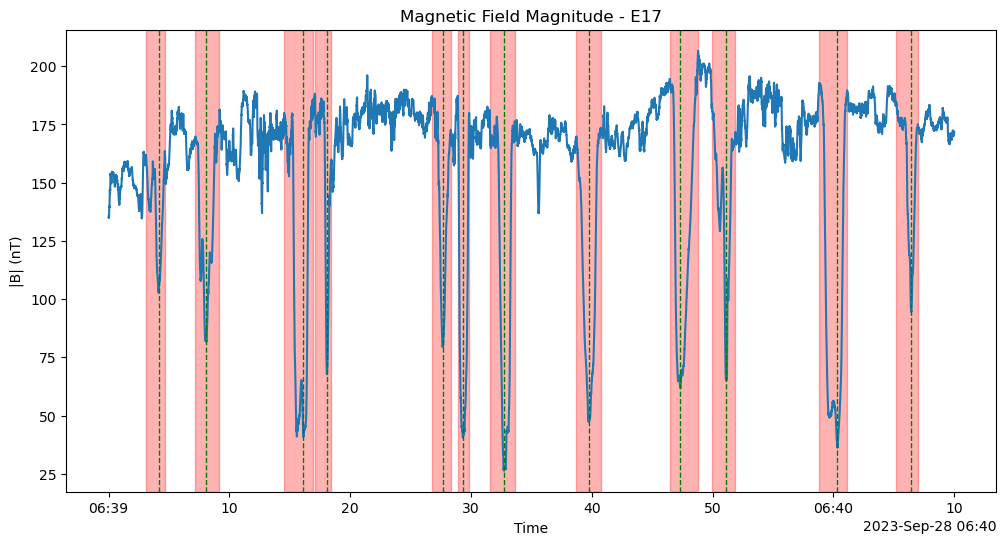


Data shape: (20508,)
Time range: 2023-09-28 06:39:00.000354560 to 2023-09-28 06:40:09.997804544


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from pytplot import get_data, store_data, tplot_rename, cdf_to_tplot
import pyspedas
from datetime import datetime

# Import your custom modules
import data_management
from data_management import *
import importlib
importlib.reload(data_management)

def read_marker_file(file_path):
    metadata = {}
    markers = []
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    current_hole = {}
    for line in lines:
        if line.startswith('[Metadata'):
            key = line.split(']')[0].split('/')[1]
            value = line.split('\t')[-1].strip()
            metadata[key] = value
        elif line.startswith('MH ') and not line.startswith('MH_MIN'):
            parts = line.split('\t')
            if len(parts) >= 4:
                hole_num = int(parts[0].split()[1])
                start = int(parts[1])
                end = int(parts[2])
                current_hole = {'number': hole_num, 'start': start, 'end': end}
        elif line.startswith('MH_MIN'):
            parts = line.split('\t')
            if len(parts) >= 2 and current_hole:
                current_hole['min'] = int(parts[1])
                markers.append(current_hole)
                current_hole = {}
    
    return metadata, markers

def print_timestamp_pairs(markers, times):
    print("\nTimestamp pairs for each hole:")
    for marker in markers:
        start_time = times[marker['start']]
        end_time = times[marker['end']]
        min_time = times[marker['min']]
        print(f"Hole {marker['number']}:")
        print(f"  Start: {start_time}")
        print(f"  End: {end_time}")
        print(f"  Min: {min_time}")
        print(f"  Duration: {end_time - start_time}")
        print()

# File path
file_path = "/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/MH_Finder_Code/_MH_Files/GSFC_MH_Hole_Analysis/E17/E17_PSP_FIELDS_2023-09-28_0639_to_0640-10_Bmag_Holes/PSP_MH_Marker_Set_2023-09-28_0639_to_0640_V2.1_MAX_AND_MIN.txt"

# Read the marker file
metadata, markers = read_marker_file(file_path)

# Print all metadata
print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Print all marker data
print("\nMarker Data:")
for marker in markers:
    print(f"Hole {marker['number']}: Start: {marker['start']}, End: {marker['end']}, Min: {marker['min']}")

# Extract trange
if 'trange' in metadata:
    trange_str = metadata['trange']
    trange_match = re.search(r"\['(.*?)', '(.*?)'\]", trange_str)
    if trange_match:
        trange = [trange_match.group(1), trange_match.group(2)]
    else:
        print(f"Warning: Could not parse trange from {trange_str}")
        trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']  # Default values
else:
    print("Error: trange not found in metadata")
    trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']  # Default values

print(f"\nExtracted trange: {trange}")

# Download and prepare high-res mag data
times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(trange)

if times is not None and bmag is not None:
    # Print timestamp pairs
    print_timestamp_pairs(markers, times)

    # Plot the data to verify
    plt.figure(figsize=(12, 6))
    plt.plot(times, bmag)
    plt.title(f"Magnetic Field Magnitude - {metadata.get('Encountr', 'Unknown')}")
    plt.xlabel("Time")
    plt.ylabel("|B| (nT)")
    
    # Highlight the magnetic holes and plot minimum lines
    for marker in markers:
        start, end, min_index = marker['start'], marker['end'], marker['min']
        plt.axvspan(times[start], times[end], color='red', alpha=0.3)
        plt.axvline(times[min_index], color='green', linestyle='--', linewidth=1)
    
    plt.show()

    print(f"\nData shape: {bmag.shape}")
    print(f"Time range: {times[0]} to {times[-1]}")
else:
    print("Error: Failed to download and prepare magnetic field data")

In [ ]:
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    current_hole = {}
    for line in lines:
        if line.startswith('[Metadata'):
            key = line.split(']')[0].split('/')[1]
            value = line.split('\t')[-1].strip()
            metadata[key] = value
        elif line.startswith('MH ') and not line.startswith('MH_MIN'):
            parts = line.split('\t')
            if len(parts) >= 4:
                hole_num = int(parts[0].split()[1])
                start = int(parts[1])
                end = int(parts[2])
                current_hole = {'number': hole_num, 'start': start, 'end': end}
        elif line.startswith('MH_MIN'):
            parts = line.split('\t')
            if len(parts) >= 2 and current_hole:
                current_hole['min'] = int(parts[1])
                markers.append(current_hole)
                current_hole = {}
    
    return metadata, markers

def print_timestamp_pairs(markers, times):
    print("\nTimestamp pairs for each hole:")
    for marker in markers:
        start_time = times[marker['start']]
        end_time = times[marker['end']]
        min_time = times[marker['min']]
        print(f"Hole {marker['number']}:")
        print(f"  Start: {start_time}")
        print(f"  End: {end_time}")
        print(f"  Min: {min_time}")
        print(f"  Duration: {end_time - start_time}")
        print()

# File path
file_path = "/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/MH_Finder_Code/_MH_Files/GSFC_MH_Hole_Analysis/E17/E17_PSP_FIELDS_2023-09-28_0639_to_0640-10_Bmag_Holes/PSP_MH_Marker_Set_2023-09-28_0639_to_0640_V2.1_MAX_AND_MIN.txt"

# Read the marker file
metadata, markers = read_marker_file(file_path)

# Print all metadata
print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Print all marker data
print("\nMarker Data:")
for marker in markers:
    print(f"Hole {marker['number']}: Start: {marker['start']}, End: {marker['end']}, Min: {marker['min']}")

# Extract trange
if 'trange' in metadata:
    trange_str = metadata['trange']
    trange_match = re.search(r"\['(.*?)', '(.*?)'\]", trange_str)
    if trange_match:
        trange = [trange_match.group(1), trange_match.group(2)]
    else:
        print(f"Warning: Could not parse trange from {trange_str}")
        trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']  # Default values
else:
    print("Error: trange not found in metadata")
    trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']  # Default values

print(f"\nExtracted trange: {trange}")

# Download and prepare high-res mag data
times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(trange)

if times is not None and bmag is not None:
    # Print timestamp pairs
    print_timestamp_pairs(markers, times)

    # Plot the data to verify
    plt.figure(figsize=(12, 6))
    plt.plot(times, bmag)
    plt.title(f"Magnetic Field Magnitude - {metadata.get('Encountr', 'Unknown')}")
    plt.xlabel("Time")
    plt.ylabel("|B| (nT)")
    
    # Highlight the magnetic holes and plot minimum lines
    for marker in markers:
        start, end, min_index = marker['start'], marker['end'], marker['min']
        plt.axvspan(times[start], times[end], color='red', alpha=0.3)
        plt.axvline(times[min_index], color='green', linestyle='--', linewidth=1)
    
    plt.show()

    print(f"\nData shape: {bmag.shape}")
    print(f"Time range: {times[0]} to {times[-1]}")
else:
    print("Error: Failed to download and prepare magnetic field data")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pyspedas import time_double, time_string, time_clip
from pytplot import get_data, store_data, tplot_rename, cdf_to_tplot
from datetime import datetime
from matplotlib.colors import LogNorm

import data_management
from data_management import *
import importlib
importlib.reload(data_management)

# Step 1: Download and load electron CDF File
cdf_file = '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'
cdf_to_tplot(cdf_file)

# Rename the loaded tplot variables
tplot_rename("EFLUX_VS_PA_E", "psp_spe_EFLUX_VS_PA_E")
tplot_rename("QUALITY_FLAG", "psp_spe_QUALITY_FLAG")
tplot_rename("EFLUX_VS_ENERGY", "psp_spe_EFLUX_VS_ENERGY")
tplot_rename("MAGF_SC", "psp_spe_MAGF_SC")

# Check if PITCHANGLE exists and rename it if it does
if "PITCHANGLE" in pytplot.tplot_names():
    tplot_rename("PITCHANGLE", "psp_spe_PITCHANGLE")
    print("PITCHANGLE variable renamed to psp_spe_PITCHANGLE")
else:
    print("PITCHANGLE variable not found in loaded data")

print("Variables after renaming:")
print(pytplot.tplot_names())

# Set the time range
trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']

# Get the data
epad_data = get_data('psp_spe_EFLUX_VS_PA_E')
epad_PA_data = get_data('psp_spe_PITCHANGLE')

epad_times = epad_data.times
epad_vals = epad_data.y
epad_PA_vals = epad_PA_data.y

# Determine the encounter number and set ebin
encounter_number = get_encounter_number(trange[0])
print(f"Encounter Number: {encounter_number}")
ebin = 8 if encounter_number in ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'] else 12
print(f"Using ebin: {ebin}")

# Download and prepare high-res mag data
times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(trange)

# Read marker file and get hole data
file_path = "/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/MH_Finder_Code/_MH_Files/GSFC_MH_Hole_Analysis/E17/E17_PSP_FIELDS_2023-09-28_0639_to_0640-10_Bmag_Holes/PSP_MH_Marker_Set_2023-09-28_0639_to_0640_V2.1_MAX_AND_MIN.txt"
metadata, markers = read_marker_file(file_path)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot magnetic field data
ax1.plot(times, bmag)
ax1.set_ylabel("|B| (nT)")
ax1.set_title(f"Magnetic Field Magnitude - {metadata.get('Encountr', 'Unknown')}")

# Highlight the magnetic holes and plot minimum lines on magnetic field plot
for marker in markers:
    start, end, min_index = marker['start'], marker['end'], marker['min']
    ax1.axvspan(times[start], times[end], color='red', alpha=0.3)
    ax1.axvline(times[min_index], color='green', linestyle='--', linewidth=1)
    
    # Add vertical lines for start and stop times on both plots
    ax1.axvline(times[start], color='blue', linestyle=':', linewidth=1)
    ax1.axvline(times[end], color='blue', linestyle=':', linewidth=1)
    ax2.axvline(times[start], color='blue', linestyle=':', linewidth=1)
    ax2.axvline(times[end], color='blue', linestyle=':', linewidth=1)

# Plot electron PAD data
im = ax2.pcolormesh(epad_times, epad_PA_vals, epad_vals[:,:,ebin].T, 
                    norm=LogNorm(), cmap='viridis')
ax2.set_ylabel('Pitch Angle (degrees)')
ax2.set_title('Electron Pitch-Angle Distribution')

# Format x-axis to show dates nicely
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Add colorbar
cbar = fig.colorbar(im, ax=ax2, pad=0.01)
cbar.set_label('Electron Flux')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print timestamp pairs
print_timestamp_pairs(markers, times)

2024-09-10 19:01:28 - 📈 Data Management Initialized


10-Sep-24 19:00:10: /var/folders/3n/8nbttjbs573270nf5nvjg3cw0000gn/T/ipykernel_7287/2257187438.py:38: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  plot_times_datetime = [datetime.utcfromtimestamp(t) for t in plot_times]



Encounter Number: E17
Using ebin: 12
Requested time range ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000'] exists within one chunk: 2023-09-28 06:00:00 to 2023-09-28 12:00:00
Loading data from pickle cache: pickle_cache/data_20230928_060000_to_20230928_120000.pkl


10-Sep-24 19:00:11: /opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),

10-Sep-24 19:00:11: /opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)



TypeError: Incompatible X, Y inputs to pcolormesh; see help(pcolormesh)

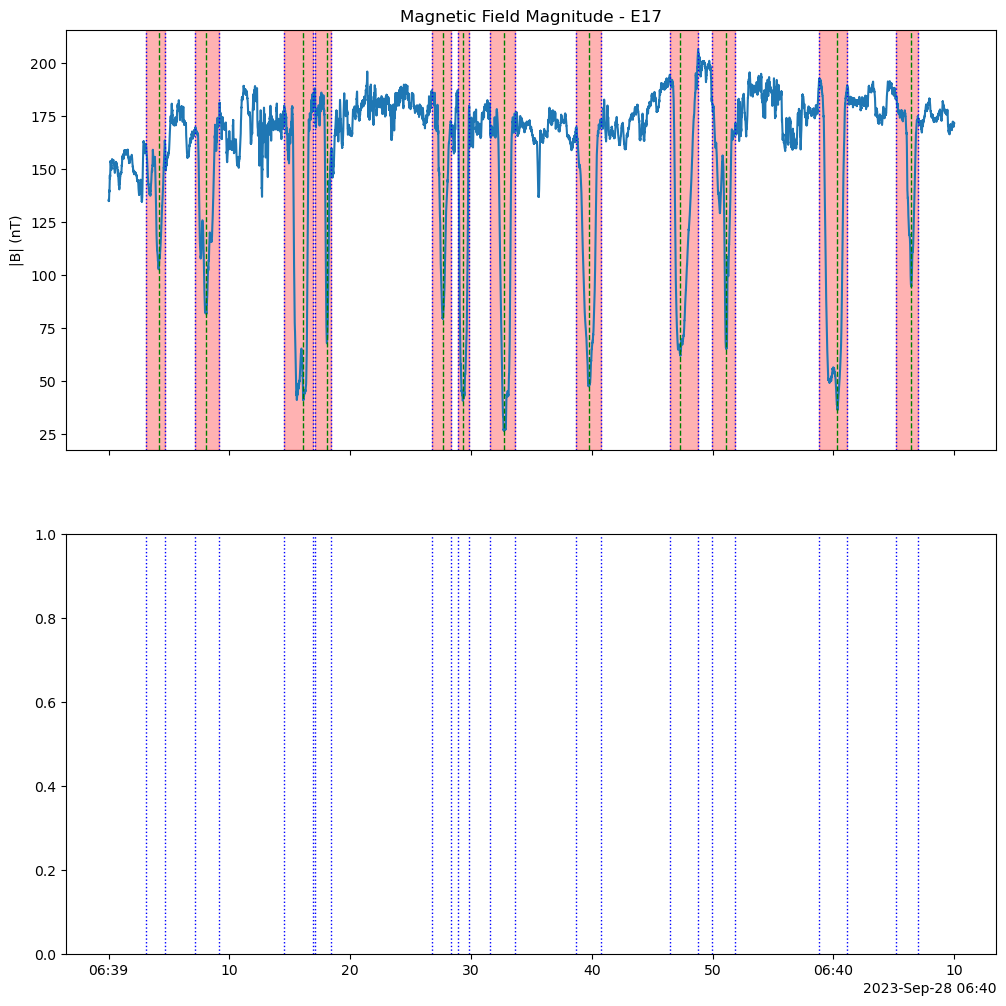

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pyspedas import time_double, time_string, time_clip
from pytplot import get_data, store_data, tplot_rename, cdf_to_tplot
from datetime import datetime
from matplotlib.colors import LogNorm  # Add this import


# Load the data (assuming this part is already done as in your snippet)
spe_sf0_pad_cdf = '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'
spe_sf0_pad_tplot = cdf_to_tplot(spe_sf0_pad_cdf, get_support_data=True)

for name in spe_sf0_pad_tplot:
    tplot_rename(name, 'psp_spe_' + name)

# Access electron pitch-angle distribution (PAD) data
epad_data = get_data('psp_spe_EFLUX_VS_PA_E')
epad_PA = get_data('psp_spe_PITCHANGLE')

epad_times = epad_data.times
epad_vals = epad_data.y
epad_PA_vals = epad_PA.y

# Define time range
trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']

# Convert trange to datetime objects
start_time = datetime.strptime(trange[0], '%Y-%m-%d/%H:%M:%S.%f')
end_time = datetime.strptime(trange[1], '%Y-%m-%d/%H:%M:%S.%f')

# Filter data within the time range
mask = (epad_times >= time_double(trange[0])) & (epad_times <= time_double(trange[1]))
plot_times = epad_times[mask]
plot_data = epad_vals[mask]

# Convert plot_times to datetime objects
plot_times_datetime = [datetime.utcfromtimestamp(t) for t in plot_times]

# Determine the encounter number and set ebin
encounter_number = get_encounter_number(trange[0])
print(f"Encounter Number: {encounter_number}")
ebin = 8 if encounter_number in ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'] else 12
print(f"Using ebin: {ebin}")

# Download and prepare high-res mag data
times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(trange)

# Read marker file and get hole data
file_path = "/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/MH_Finder_Code/_MH_Files/GSFC_MH_Hole_Analysis/E17/E17_PSP_FIELDS_2023-09-28_0639_to_0640-10_Bmag_Holes/PSP_MH_Marker_Set_2023-09-28_0639_to_0640_V2.1_MAX_AND_MIN.txt"
metadata, markers = read_marker_file(file_path)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot magnetic field data
ax1.plot(times, bmag)
ax1.set_ylabel("|B| (nT)")
ax1.set_title(f"Magnetic Field Magnitude - {metadata.get('Encountr', 'Unknown')}")

# Highlight the magnetic holes and plot minimum lines on magnetic field plot
for marker in markers:
    start, end, min_index = marker['start'], marker['end'], marker['min']
    ax1.axvspan(times[start], times[end], color='red', alpha=0.3)
    ax1.axvline(times[min_index], color='green', linestyle='--', linewidth=1)
    
    # Add vertical lines for start and stop times on both plots
    ax1.axvline(times[start], color='blue', linestyle=':', linewidth=1)
    ax1.axvline(times[end], color='blue', linestyle=':', linewidth=1)
    ax2.axvline(times[start], color='blue', linestyle=':', linewidth=1)
    ax2.axvline(times[end], color='blue', linestyle=':', linewidth=1)

# Plot electron PAD data
im = ax2.pcolormesh(plot_times_datetime, epad_PA_vals, plot_data[:,:,ebin].T, 
                    norm=LogNorm(), cmap='viridis')  # Use LogNorm() directly
ax2.set_ylabel('Pitch Angle (degrees)')
ax2.set_title('Electron Pitch-Angle Distribution')

# Format x-axis to show dates nicely
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Add colorbar
cbar = fig.colorbar(im, ax=ax2, pad=0.01)
cbar.set_label('Electron Flux')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print timestamp pairs
print_timestamp_pairs(markers, times)

In [ ]:
#THE GRAND COMBINATION
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pyspedas import time_double, time_string, time_clip
from pytplot import get_data, store_data, tplot_rename, cdf_to_tplot
import pytplot
from datetime import datetime
from matplotlib.colors import LogNorm

import data_management
from data_management import *
import importlib
importlib.reload(data_management)

# File paths
cdf_file = '/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/High_Resolution_Electrons/psp_swp_spe_af0_L3_pad_20230928_v04.cdf'
marker_file = "/Users/robertalexander/Dropbox/__Collaborations/_NASA/__MH_Investigation/MH_Finder_Code/_MH_Files/GSFC_MH_Hole_Analysis/E17/E17_PSP_FIELDS_2023-09-28_0639_to_0640-10_Bmag_Holes/PSP_MH_Marker_Set_2023-09-28_0639_to_0640_V2.1_MAX_AND_MIN.txt"

# Load electron CDF File
cdf_to_tplot(cdf_file)

# Rename the loaded tplot variables
tplot_rename("EFLUX_VS_PA_E", "psp_spe_EFLUX_VS_PA_E")
tplot_rename("QUALITY_FLAG", "psp_spe_QUALITY_FLAG")
tplot_rename("EFLUX_VS_ENERGY", "psp_spe_EFLUX_VS_ENERGY")
tplot_rename("MAGF_SC", "psp_spe_MAGF_SC")

# Check if PITCHANGLE exists and rename it if it does
if "PITCHANGLE" in pytplot.tplot_names():
    tplot_rename("PITCHANGLE", "psp_spe_PITCHANGLE")
    print("PITCHANGLE variable renamed to psp_spe_PITCHANGLE")
else:
    print("PITCHANGLE variable not found in loaded data")

print("Variables after renaming:")
print(pytplot.tplot_names())

# Set the time range
trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000']

# Get the electron data
epad_data = get_data('psp_spe_EFLUX_VS_PA_E')

# Check if PITCHANGLE exists in the loaded variables
if 'psp_spe_PITCHANGLE' in pytplot.tplot_names():
    epad_PA_data = get_data('psp_spe_PITCHANGLE')
    epad_PA = epad_PA_data.y
    print("Using loaded pitch angle data")
else:
    print("PITCHANGLE variable not found. Using default pitch angle values.")
    # Create a default pitch angle array if PITCHANGLE is not available
    epad_PA = np.linspace(0, 180, epad_data.y.shape[1])

times = epad_data.times
epad_vals = epad_data.y

# Determine the encounter number and set ebin
encounter_number = get_encounter_number(trange[0])
print(f"Encounter Number: {encounter_number}")
ebin = 8 if encounter_number in ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'] else 12
print(f"Using ebin: {ebin}")

# Process the electron data
epad_strahl = epad_vals[:, :, ebin]

# Download and prepare high-res mag data
mag_times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(trange)

# Read marker file and get hole data
metadata, markers = read_marker_file(marker_file)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot magnetic field data
ax1.plot(mag_times, bmag)
ax1.set_ylabel("|B| (nT)")
ax1.set_title(f"Magnetic Field Magnitude - {metadata.get('Encountr', 'Unknown')}")

# Plot electron PAD data
im = ax2.pcolormesh(times, epad_PA, epad_strahl.T, 
                    norm=LogNorm(), cmap='viridis')
ax2.set_ylabel('Pitch Angle (degrees)')
ax2.set_title('Electron Pitch-Angle Distribution')

# Highlight the magnetic holes and plot start/stop/min lines on both plots
for marker in markers:
    start, end, min_index = marker['start'], marker['end'], marker['min']
    
    # Highlight the magnetic hole duration
    ax1.axvspan(mag_times[start], mag_times[end], color='red', alpha=0.3)
    ax2.axvspan(mag_times[start], mag_times[end], color='red', alpha=0.3)
    
    # Plot minimum line
    ax1.axvline(mag_times[min_index], color='green', linestyle='--', linewidth=1)
    ax2.axvline(mag_times[min_index], color='green', linestyle='--', linewidth=1)
    
    # Plot start and stop lines
    ax1.axvline(mag_times[start], color='blue', linestyle=':', linewidth=1)
    ax1.axvline(mag_times[end], color='blue', linestyle=':', linewidth=1)
    ax2.axvline(mag_times[start], color='blue', linestyle=':', linewidth=1)
    ax2.axvline(mag_times[end], color='blue', linestyle=':', linewidth=1)

# Format x-axis to show dates nicely
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Add colorbar for electron flux
cbar = fig.colorbar(im, ax=ax2, pad=0.01)
cbar.set_label('Electron Flux')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print timestamp pairs
print_timestamp_pairs(markers, mag_times)

2024-09-10 19:07:04 - 📈 Data Management Initialized


10-Sep-24 19:07:05: /opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),

10-Sep-24 19:07:05: /opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)



0 : psp_spe_QUALITY_FLAG
1 : psp_spe_EFLUX_VS_PA_E
2 : psp_spe_EFLUX_VS_ENERGY
3 : psp_spe_MAGF_SC
PITCHANGLE variable not found in loaded data
Variables after renaming:
0 : psp_spe_QUALITY_FLAG
1 : psp_spe_EFLUX_VS_PA_E
2 : psp_spe_EFLUX_VS_ENERGY
3 : psp_spe_MAGF_SC
['psp_spe_QUALITY_FLAG', 'psp_spe_EFLUX_VS_PA_E', 'psp_spe_EFLUX_VS_ENERGY', 'psp_spe_MAGF_SC']
0 : psp_spe_QUALITY_FLAG
1 : psp_spe_EFLUX_VS_PA_E
2 : psp_spe_EFLUX_VS_ENERGY
3 : psp_spe_MAGF_SC
PITCHANGLE variable not found. Using default pitch angle values.
Encounter Number: E17
Using ebin: 12
Requested time range ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000'] exists within one chunk: 2023-09-28 06:00:00 to 2023-09-28 12:00:00
Loading data from pickle cache: pickle_cache/data_20230928_060000_to_20230928_120000.pkl


NameError: name 'read_marker_file' is not defined

In [ ]:
#✅ #Download Proton Data And Rename Variables, and calculate common plasma parameters and PADs
#Note that pyspedas currently loads in both the alphas (data product sf0a) and protons (sf00) with the same tplot variable name, 
#so we need to rename the alphas and proton tplot variables with different names, otherwise one will overwrite the other. 
#Pyspedas and pytplot is still in development, so this may change in the future.
#pyspedas psp readme: https://pyspedas.readthedocs.io/en/latest/psp.html
#tplot readme: https://pytplot.readthedocs.io/en/stable/index.html

mag_datatype = 'mag_rtn_4_sa_per_cyc' # Set the datatype for magnetic field data
#mag_datatype = 'mag_rtn' # Set the datatype for magnetic field data 
mag_vars = pyspedas.psp.fields(trange=trange, datatype=mag_datatype, level='l2', time_clip=True, get_support_data=True) # Download magnetic field data

# Protons
# Specify the span-i data type to plot
# spi = solar probe instrument, sf00 = protons
spi_sf00_datatype='spi_sf00_l3_mom' # Set the datatype for proton data
spi_sf00_vars = pyspedas.psp.spi(trange=trange, datatype=spi_sf00_datatype, level='l3', time_clip=True) # Download proton data

#rename tplot variables to distinguish proton variable name from alpha variable name
tplot_rename("psp_spi_QUALITY_FLAG","proton_QUALITY_FLAG")
tplot_rename("psp_spi_DENS","proton_DENS")
tplot_rename("psp_spi_VEL_INST","proton_VEL_INST")
tplot_rename("psp_spi_VEL_SC","proton_VEL_SC")
tplot_rename("psp_spi_VEL_RTN_SUN","proton_VEL_RTN_SUN")
tplot_rename("psp_spi_T_TENSOR_INST","proton_T_TENSOR_INST")
tplot_rename("psp_spi_TEMP","proton_TEMP")
tplot_rename("psp_spi_EFLUX_VS_ENERGY","proton_EFLUX_VS_ENERGY")
tplot_rename("psp_spi_EFLUX_VS_THETA","proton_EFLUX_VS_THETA")
tplot_rename("psp_spi_EFLUX_VS_PHI","proton_EFLUX_VS_PHI")
tplot_rename("psp_spi_SUN_DIST","proton_SUN_DIST")
tplot_rename("psp_spi_VENUS_DIST","proton_VENUS_DIST")
tplot_rename("psp_spi_SC_VEL_RTN_SUN","proton_SC_VEL_RTN_SUN")
tplot_rename("psp_spi_QUAT_SC_TO_RTN","proton_QUAT_SC_TO_RTN")
tplot_rename("psp_spi_MAGF_SC","proton_MAGF_SC")
tplot_rename("psp_spi_MAGF_INST","proton_MAGF_INST")

#---------------------------------------------------------//
# ✅ Store |B|, Btn, |Vsw|, Vtn, Vr
# Split magnetic field vector into 3 separate tplot variables (xyz = rtn)

global save_dir, trange, trange_start, trange_stop

print(trange_start,trange_stop)

split_vec('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

#access data in magnetic field components
br = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc_x')
#note that times are stored in arrays as br.times and br.y for the values
bt = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc_y')
bn = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc_z')
#define |B| and store as tplot variable
bmag = np.sqrt(br.y**2 + bt.y **2 + bn.y**2)

store_data('|B|',data = {'x': br.times, 'y': bmag})
options('|B|', 'color', ['green'])
#Separate T and N components on one panel
store_data('Btn', data = ['psp_fld_l2_mag_RTN_4_Sa_per_Cyc_y','psp_fld_l2_mag_RTN_4_Sa_per_Cyc_z'])
options('Btn', 'color', ['red', 'blue']) 
options('Btn', 'legend_names', ['Bt', 'Bn'])
options('Btn','ytitle','Btn')
tplot_rename("psp_fld_l2_mag_RTN_4_Sa_per_Cyc_x","Br")
options('Br','ytitle','Br')
options('Br','color','black')

#Split velocity vector into 3 separate tplot variables (xyz = rtn)
split_vec('proton_VEL_RTN_SUN')

#access data in velocity components
vr = get_data('proton_VEL_RTN_SUN_x')
vt = get_data('proton_VEL_RTN_SUN_y')
vn = get_data('proton_VEL_RTN_SUN_z')
#define |Vsw| and store as tplot variable
vmag = np.sqrt(vr.y**2 + vt.y **2 + vn.y**2)
store_data('|Vsw|',data = {'x': vr.times, 'y': vmag})
#Separate T and N components on one panel
store_data('Vtn', data = ['proton_VEL_RTN_SUN_y','proton_VEL_RTN_SUN_z'])
options('Vtn', 'color', ['red', 'blue'])
options('Vtn', 'legend_names', ['Vt', 'Vn'])
options('Vtn','ytitle','Vtn')
tplot_rename("proton_VEL_RTN_SUN_x","Vr")
options('Vr','ytitle','Vr')
options('Vr','color','black')

#---------------------------------------------------------//
#✅ Calculate Proton temperature anisotropy from Temperature Tensor, Tperp and Tparallel

#Access tensor elements
T_Tens = get_data('proton_T_TENSOR_INST')
T_XX = T_Tens.y[:,0]
T_YY = T_Tens.y[:,1]
T_ZZ = T_Tens.y[:,2]
T_XY = T_Tens.y[:,3]
T_XZ = T_Tens.y[:,4]
T_YZ = T_Tens.y[:,5]

T_YX = T_XY
T_ZX = T_XZ
T_ZY = T_YZ

#Access magnetic field in span-I coordinates
B_spi = get_data('proton_MAGF_INST')
B_X = B_spi.y[:,0]
B_Y = B_spi.y[:,1]
B_Z = B_spi.y[:,2]
B_mag_XYZ = np.sqrt(B_X**2 + B_Y**2 + B_Z**2)

#Project Tensor onto B field, find perpendicular and parallel components
T_parallel=[]
T_perpendicular=[]
Anisotropy=[]
for i in range(len(B_X)):
    Sum_1=B_X[i]*B_X[i]*T_XX[i]
    Sum_2=B_X[i]*B_Y[i]*T_XY[i]
    Sum_3=B_X[i]*B_Z[i]*T_XZ[i]
    Sum_4=B_Y[i]*B_X[i]*T_YX[i]
    Sum_5=B_Y[i]*B_Y[i]*T_YY[i]
    Sum_6=B_Y[i]*B_Z[i]*T_YZ[i]
    Sum_7=B_Z[i]*B_X[i]*T_ZX[i]
    Sum_8=B_Z[i]*B_Y[i]*T_ZY[i]
    Sum_9=B_Z[i]*B_Z[i]*T_ZZ[i]    
    T_para=((Sum_1+Sum_2+Sum_3+Sum_4+Sum_5+Sum_6+Sum_7+Sum_8+Sum_9)/(B_mag_XYZ[i])**2)
    Trace_Temp=(T_XX[i]+T_YY[i]+T_ZZ[i])
    T_perp=(Trace_Temp-T_para)/2.0
    T_parallel.append((Sum_1+Sum_2+Sum_3+Sum_4+Sum_5+Sum_6+Sum_7+Sum_8+Sum_9)/(B_mag_XYZ[i])**2)
    T_perpendicular.append(T_perp)
    Anisotropy.append(T_perp/T_para)

#store tplot variables
store_data('Proton TA',data={'x':B_spi.times,'y': Anisotropy}) #ratio Tperp/Tpar <-- HELPFUL!
store_data('Proton Tperp',data={'x':B_spi.times,'y': T_perpendicular})
store_data('Proton Tpar',data={'x':B_spi.times,'y': T_parallel})
store_data('Proton TperpTpar',data=['Proton Tperp', 'Proton Tpar'])
options('Proton TperpTpar', 'color', ['hotpink', 'deepskyblue'])
options('Proton TperpTpar', 'legend_names', ['Tperp', 'Tpar'])
#options('Proton TperpTpar','yrange',[0,200])
options('Proton TperpTpar','ytitle','Proton T⊥/T∥')


#---------------------------------------------------------//
#✅ Calculate electron strahl pitch-angle distributions (PAD)
# AKA the ultimate tracer of field topology

# Access electron strahl pitch-angle distribution (PAD)
spe_datatype = 'spe_sf0_pad'
spe_vars = pyspedas.psp.spe(trange=trange, datatype=spe_datatype, level='l3', time_clip=True, get_support_data=True)

epad_data = get_data('psp_spe_EFLUX_VS_PA_E')
epad_PA = get_data('psp_spe_PITCHANGLE')

times = epad_data.times
epad_vals = epad_data.y
epad_PA_vals = epad_PA.y

encounter_number = get_encounter_number(trange_start)
print(f"Encounter Number: {encounter_number}")

# Set the ebin based on the encounter number
if encounter_number in ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9']:
    ebin = 8
else:
    ebin = 12

print(f"Using ebin: {ebin}") # Note for E1-E9, electron strahl energy bin is 8, for E10 and above, it's 12

epad_strahl = epad_vals[:, :, ebin]
store_data('E Strahl', data={'x': times, 'y': epad_strahl, 'v': epad_PA_vals})
pytplot.options('E Strahl', 'Spec', 1)
pytplot.options('E Strahl', 'Zlog', 1)

pytplot.tplot_options('wsize', [1000, 800])
pytplot.tplot_options('axis_font_size', 10)
pytplot.tplot_options('yaxis_width', 2000)

# Proton Energy
options('proton_EFLUX_VS_ENERGY', 'ytitle', 'Proton Energy')

